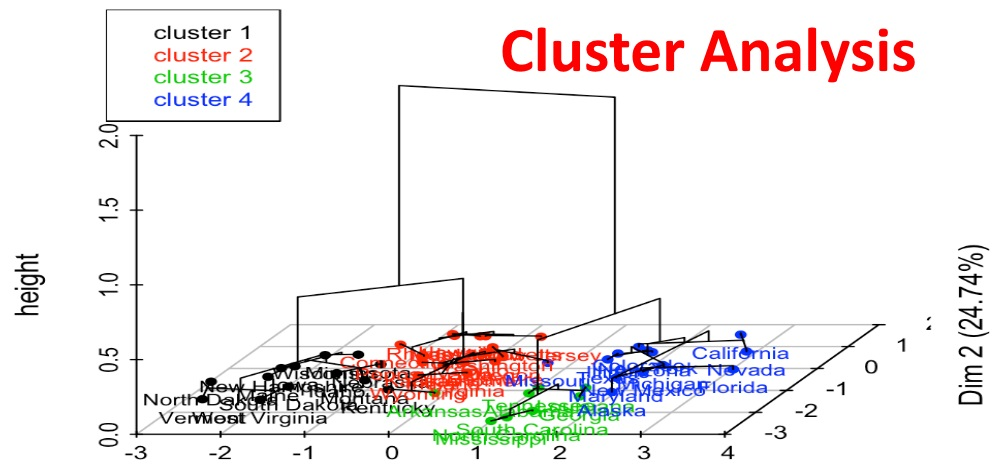

#  Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans as KM
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn.preprocessing import StandardScaler

## K-Means Clustering

The function `KM()` performs *K*-means clustering in `Python`. We begin with a simple simulated example in which there truly are two clusters in the data: 

In [2]:
np.random.seed(2)
x1 = pd.DataFrame(np.random.normal(size=50), columns=['col1'])
x2 = pd.DataFrame(np.random.normal(size=50), columns=['col2'])
x = pd.concat([x1, x2], axis=1)
x.head()

,col1,col2
0,-0.416758,1.000366
1,-0.056267,-0.381093
2,-2.136196,-0.375669
3,1.640271,-0.074471
4,-1.793436,0.433496


The first 25 observations in the first variable (`col1`) have a mean shift relative to the next 25 observations (`col2`).

In [3]:
x.col1.iloc[0:24] += 3
x.col2.iloc[0:24] -= 4
x.head()

,col1,col2
0,2.583242,-2.999634
1,2.943733,-4.381093
2,0.863804,-4.375669
3,4.640271,-4.074471
4,1.206564,-3.566504


We now perform K-means clustering with *K* = 2.

In [4]:
km_out = KM(n_clusters=2, n_init=20).fit(x)

The cluster assignments of the 50 observations are contained in `labels_`

In [5]:
km_labels = km_out.labels_
km_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

The *K*-means clustering perfectly separated the observations into two clusters even though we did not supply any group information to `KM()`. We can plot the data, with each observation colored according to its cluster assignment.

Text(0.5, 1.0, 'K-means clustering results with K=2')

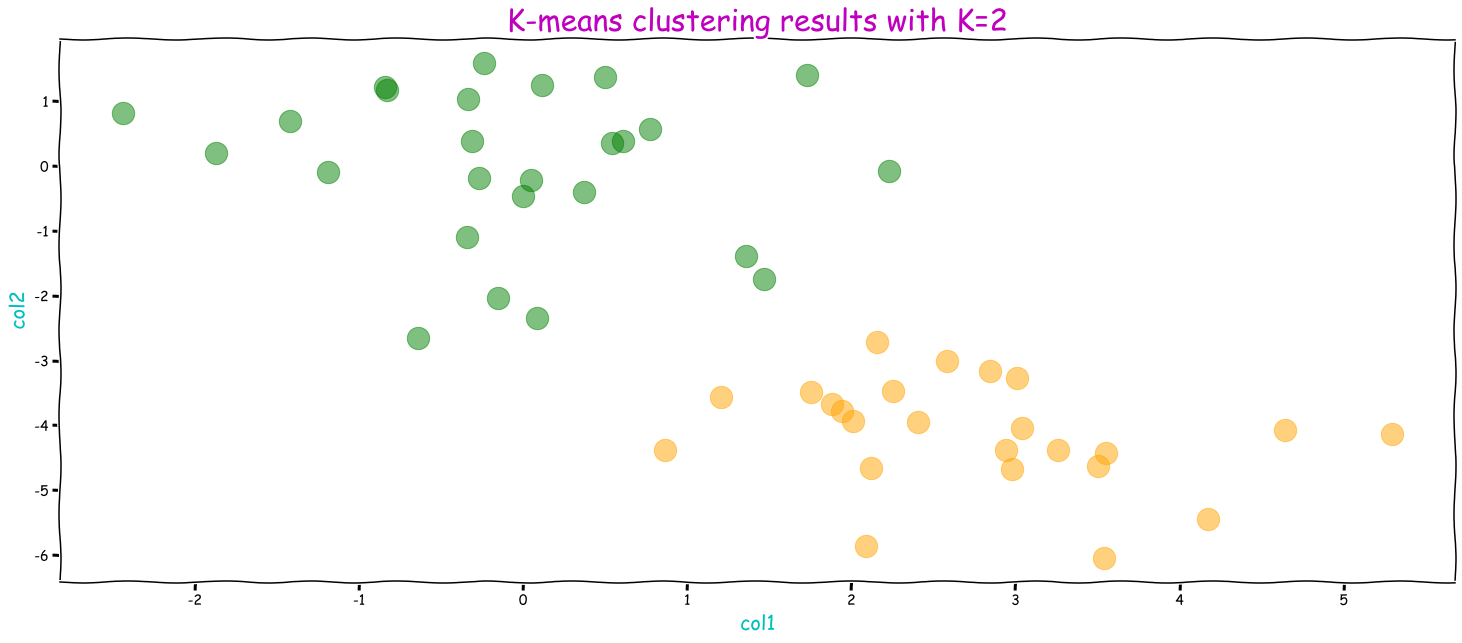

In [6]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(x.col1[km_labels==0], x.col2[km_labels==0], color='green', s=500, alpha=0.5)
plt.scatter(x.col1[km_labels==1], x.col2[km_labels==1], color='orange', s=500, alpha=0.5)
plt.xlabel('col1', fontsize=20, color='c')
plt.ylabel('col2', fontsize=20, color='c')
plt.title('K-means clustering results with K=2', fontsize=30, color='m')

Here the observations can be easily plotted because they are two-dimensional. If there were more than two variables then we could instead perform PCA and plot the first two principal components score vectors.

In this example, we knew that there really were two clusters because we generated the data. However, for real data, in general we do not know the true number of clusters. We could instead have performed *K*-means clustering on this example with *K* = 3.

In [7]:
np.random.seed(4) # this isn't the same as the seed in R mentioned in book. Nonetheless, I use the same seed here
km_out = KM(n_clusters=3, n_init=20).fit(x)
km_labels = km_out.labels_
km_labels

array([2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2])

Text(0.5, 1.0, 'K-means clustering results with K=3')

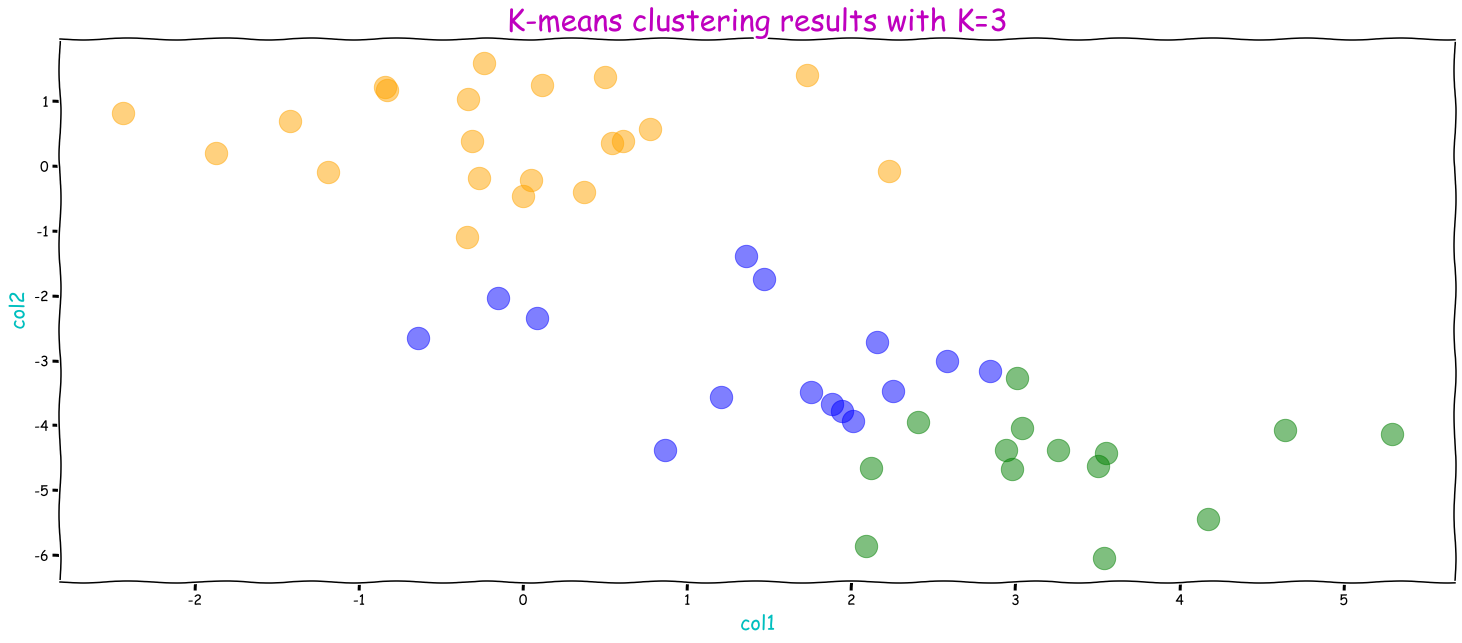

In [8]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(x.col1[km_labels==0], x.col2[km_labels==0], color='green', s=500, alpha=0.5)
plt.scatter(x.col1[km_labels==1], x.col2[km_labels==1], color='orange', s=500, alpha=0.5)
plt.scatter(x.col1[km_labels==2], x.col2[km_labels==2], color='blue', s=500, alpha=0.5)
plt.xlabel('col1', fontsize=20, color='c')
plt.ylabel('col2', fontsize=20, color='c')
plt.title('K-means clustering results with K=3', fontsize=30, color='m')

When *K* = 3, *K*-means clustering splits up the two clusters.

When performing K-means clustering, in addition to using multiple initial cluster assignments, it is also important to set a random seed using the `random.seed()` function. This way, the initial cluster assignments in Step 1 can be replicated, and the K-means output will be fully reproducible.

## Hierarchical Clustering

The `linkage()` function implements hierarchical clustering in `Python`. In the following example we use the data from the previous lab to plot the hierarchical clustering dendrogram using complete, single, and average linkage clustering, with Euclidean distance as the dissimilarity measure. We begin by clustering observations using complete linkage. The `method=` function is used to compute the 50 × 50 inter-observation Euclidean distance matrix.

In [9]:
hc_complete = linkage(y=x, method='complete')

In [21]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    50 non-null     float64
 1   col2    50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes


We could just as easily perform hierarchical clustering with average or single linkage instead:

In [10]:
hc_average = linkage(y=x, method='average')
hc_single = linkage(y=x, method='single')

We can now plot the dendrograms obtained using the usual `pyplot()` functions. The numbers at the bottom of the plot identify each observation.

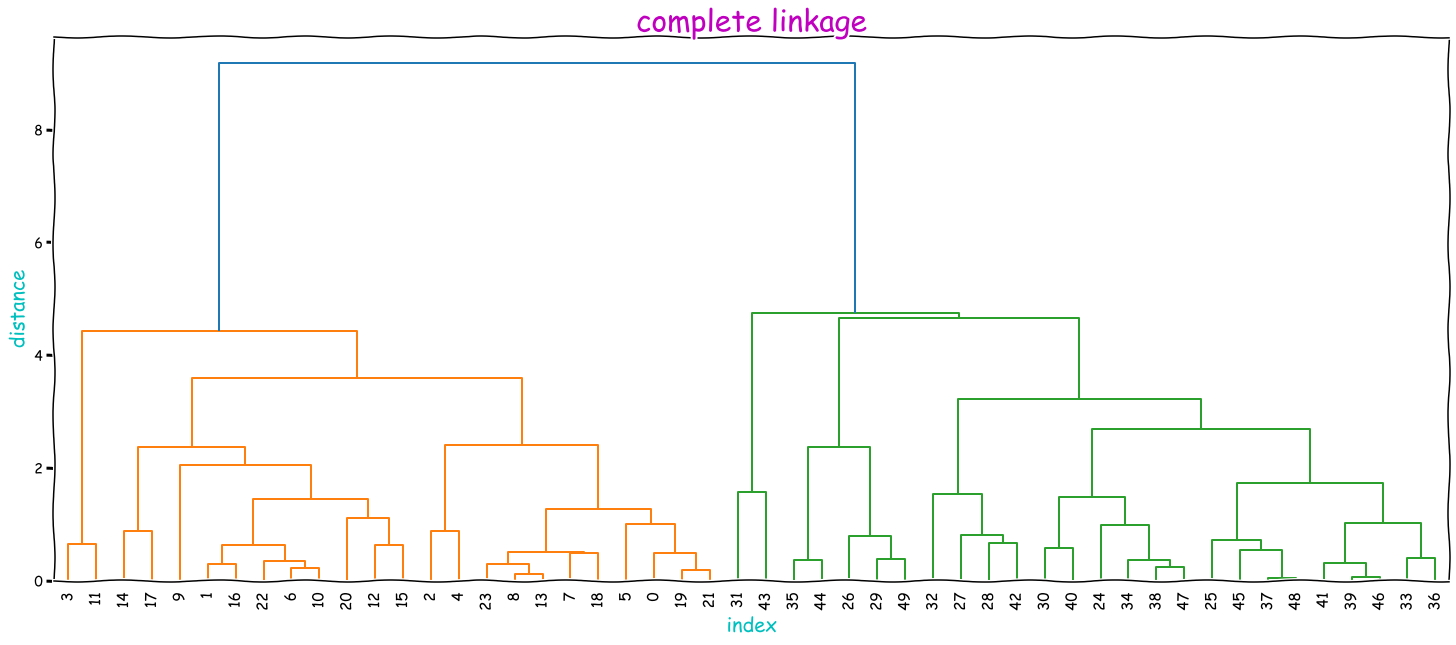

In [11]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.title('complete linkage', fontsize=30, color='m')
plt.xlabel('index', fontsize=20, color='c')
plt.ylabel('distance', fontsize=20, color='c')
dendrogram(hc_complete, leaf_rotation=90., leaf_font_size=15., show_leaf_counts=True)
plt.show()

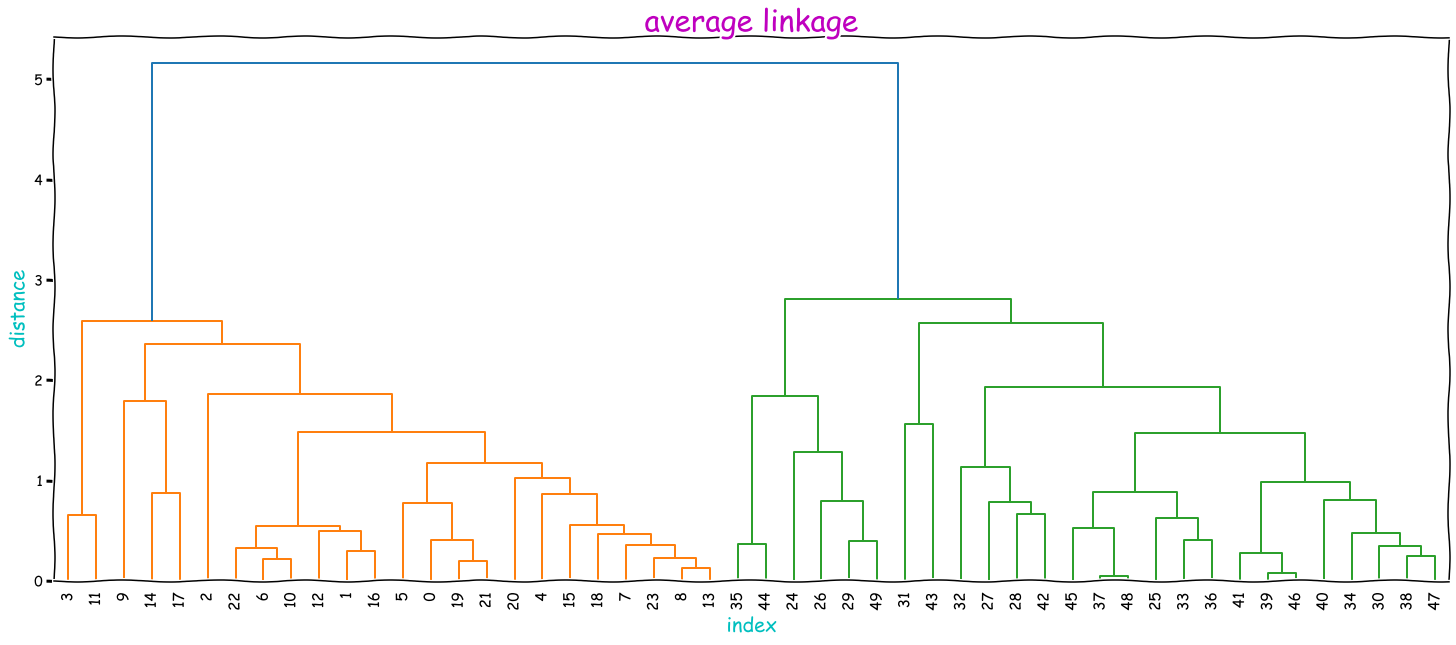

In [12]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.title('average linkage', fontsize=30, color='m')
plt.xlabel('index', fontsize=20, color='c')
plt.ylabel('distance', fontsize=20, color='c')
dendrogram(hc_average, leaf_rotation=90., leaf_font_size=15., show_leaf_counts=True)
plt.show()

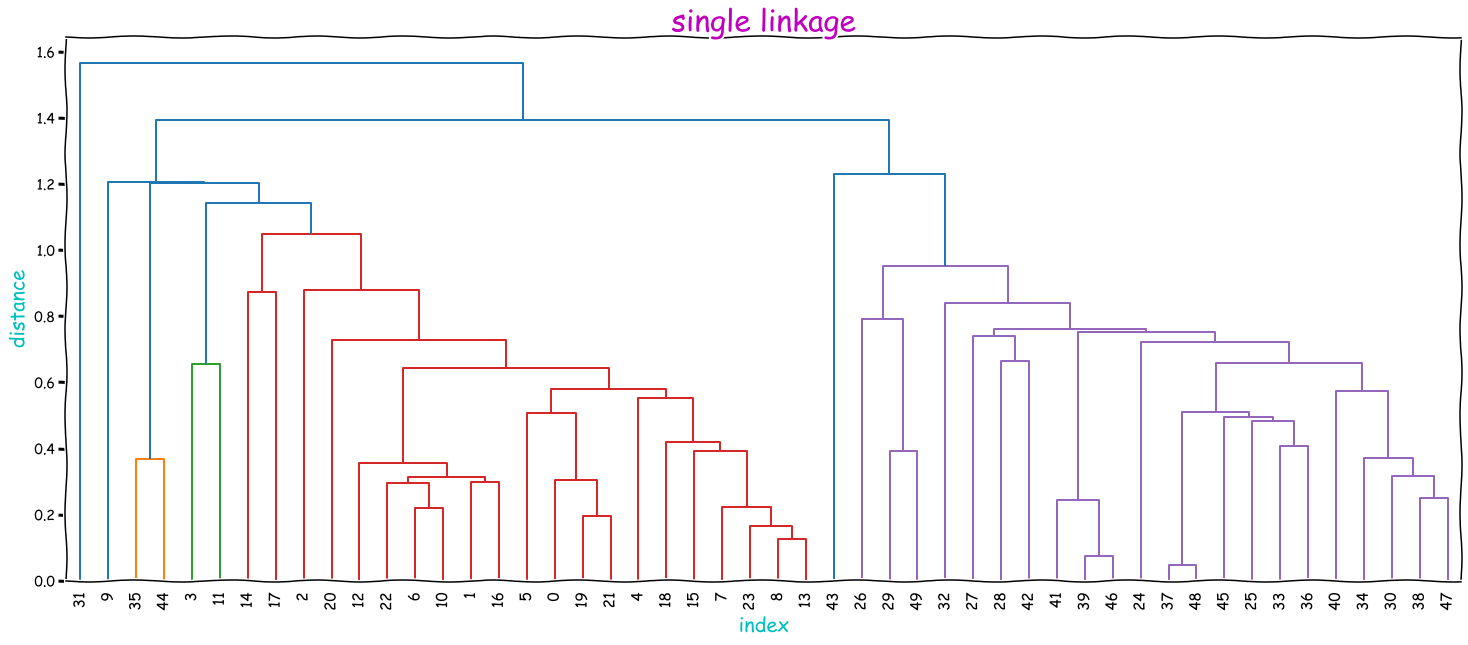

In [13]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.title('single linkage', fontsize=30, color='m')
plt.xlabel('index', fontsize=20, color='c')
plt.ylabel('distance', fontsize=20, color='c')
dendrogram(hc_single, leaf_rotation=90., leaf_font_size=15., show_leaf_counts=True)
plt.show()

To determine the cluster labels for each observation associated with a given cut of the dendrogram, we can use the `cut_tree()` function:

In [14]:
cut_tree(hc_complete, n_clusters=2).T

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1]])

In [15]:
cut_tree(hc_average, n_clusters=2).T

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1]])

In [16]:
cut_tree(hc_single, n_clusters=2).T

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]])

The second argument to `cut_tree()` is the number of clusters we wish to obtain. For this data, complete and average linkage generally separate the observations into their correct groups. However, single linkage identifies one point as belonging to its own cluster. A more sensible answer is obtained when four clusters are selected, although there are still two singletons.

In [17]:
cut_tree(hc_single, n_clusters=4).T

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3,
        0, 1, 1, 1, 1, 1]])

To scale the variables before performing hierarchical clustering of the observations, we use the `StandardScaler().fit_transform()` function:

In [18]:
xsc = StandardScaler().fit_transform(x)
xsc

array([[ 0.73858455, -0.43955324],
       [ 0.94611064, -1.03963923],
       [-0.25125509, -1.03728352],
       [ 1.92276694, -0.90644708],
       [-0.05393603, -0.68579336],
       [ 0.49392821, -0.31878817],
       [ 1.26799896, -1.14979375],
       [ 0.26161943, -0.65325789],
       [ 0.36946422, -0.78022029],
       [ 0.45520808, -1.68145297],
       [ 1.29596107, -1.05624318],
       [ 2.29807165, -0.93157983],
       [ 1.00241535, -0.89128678],
       [ 0.33493907, -0.73248675],
       [ 1.28882514, -1.76038552],
       [ 0.63530717, -0.85400529],
       [ 0.96748914, -1.16847072],
       [ 1.65492232, -1.49936999],
       [ 0.54797062, -0.64635108],
       [ 0.98369773, -0.55470298],
       [ 0.47299632, -1.15786071],
       [ 0.88844669, -0.50814694],
       [ 1.12620361, -1.0398234 ],
       [ 0.40928557, -0.84521615],
       [-0.94357815,  0.38616875],
       [-0.88449194,  1.55172418],
       [-1.11560922, -0.29178183],
       [-1.43220652,  0.82371968],
       [-1.56668732,

In [19]:
hc_complete_xsc = linkage(y=xsc, method='complete')

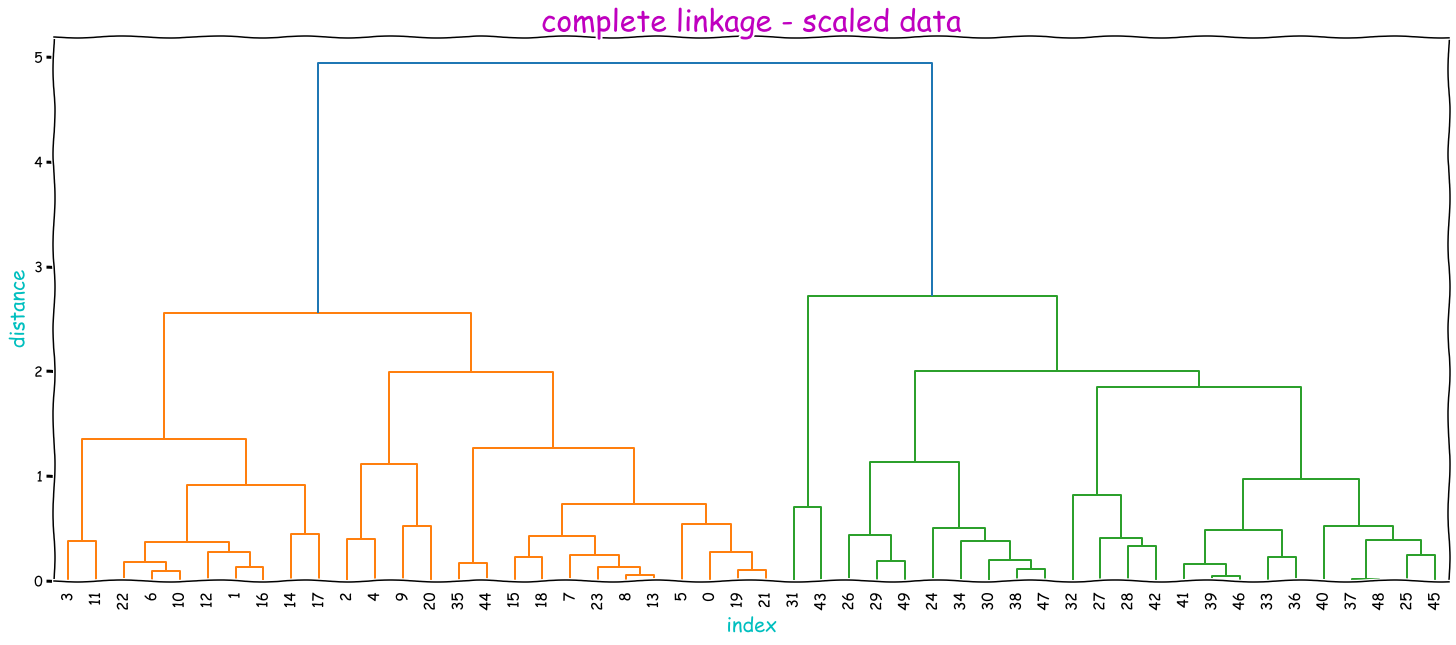

In [20]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.title('complete linkage - scaled data', fontsize=30, color='m')
plt.xlabel('index', fontsize=20, color='c')
plt.ylabel('distance', fontsize=20, color='c')
dendrogram(hc_complete_xsc, leaf_rotation=90., leaf_font_size=15., show_leaf_counts=True)
plt.show()